In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import random
from PIL import Image
from skimage import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.layers import layers
import seaborn as sns
import matplotlib.pyplot as plt

2023-11-19 01:23:11.475261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 '/Users/andrii.p/Downloads/ds/tom_and_jerry/tom_and_jerry/',
  validation_split=0.3,
  subset='training',
  seed=42,
  image_size=(150, 150),
  batch_size=32,
)

Found 5478 files belonging to 4 classes.
Using 3835 files for training.


In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/andrii.p/Downloads/ds/tom_and_jerry/tom_and_jerry/',
  validation_split=0.3,
  subset='validation',
  seed=42,
  image_size=(150, 150),
  batch_size=32,
)


Found 5478 files belonging to 4 classes.
Using 1643 files for validation.


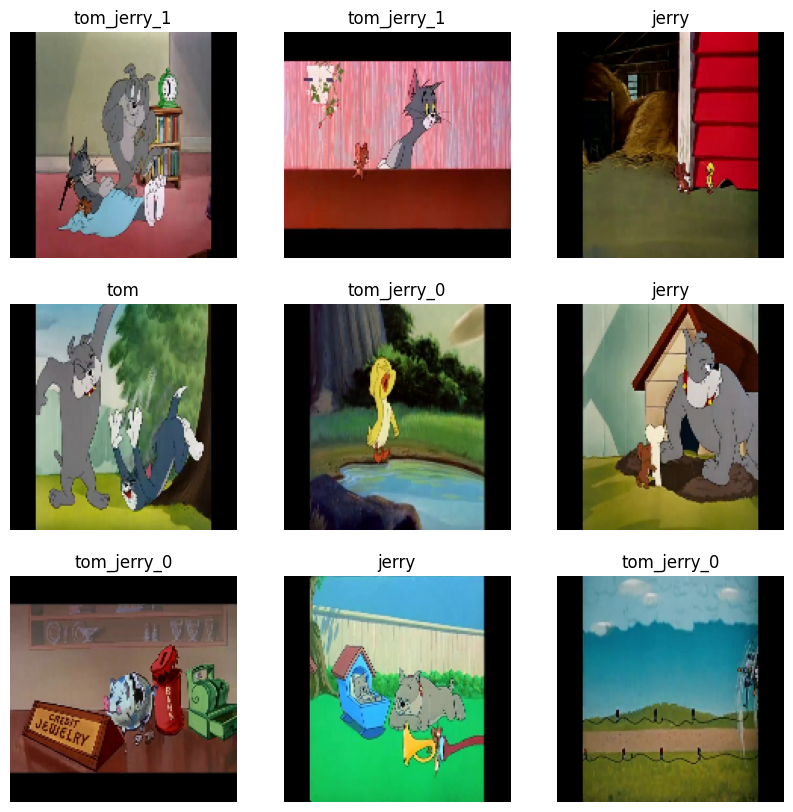

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[int(labels[i])])
        plt.axis("off")

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4),
])

In [6]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [7]:
model.fit(train_ds, epochs=3)

Epoch 1/3
120/120 [==============================] - 42s 338ms/step - loss: 1.3030 - accuracy: 0.3846
Epoch 2/3
120/120 [==============================] - 42s 344ms/step - loss: 1.0499 - accuracy: 0.5619
Epoch 3/3
120/120 [==============================] - 39s 322ms/step - loss: 0.7254 - accuracy: 0.7166


In [8]:
predictions = model.predict(test_ds)

52/52 [==============================] - 5s 95ms/step


In [9]:
predictions = np.argmax(predictions, axis=1)

In [10]:
predictions

array([1, 3, 2, ..., 2, 2, 0])

In [11]:
test = np.asarray([label for _, label in test_ds.unbatch()])

In [12]:
print(accuracy_score(test, predictions))

0.26171637248934876


In [13]:
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       0.23      0.21      0.22       356
           1       0.33      0.34      0.34       583
           2       0.25      0.28      0.27       462
           3       0.14      0.12      0.12       242

    accuracy                           0.26      1643
   macro avg       0.24      0.24      0.24      1643
weighted avg       0.26      0.26      0.26      1643



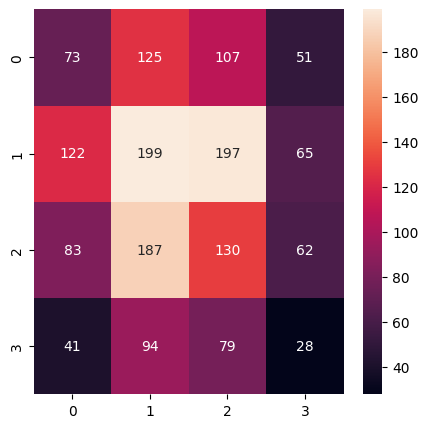

In [14]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(test, predictions)
sns.heatmap(cm, annot=True,fmt='d')
plt.show()

In [15]:
img = keras.utils.load_img(
    "Downloads/ds/tom_and_jerry/tom_and_jerry/jerry/frame2803.jpg", target_size=(150,150)
)

(-0.5, 149.5, 149.5, -0.5)

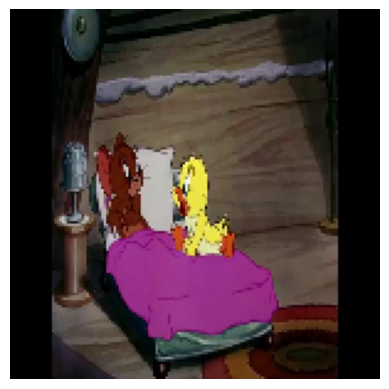

In [16]:
plt.imshow(img)
plt.axis("off")

In [17]:
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

In [18]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 71ms/step


In [19]:
predictions

array([[ 5.1994505, -1.703677 ,  1.3493907, -0.8864271]], dtype=float32)

In [20]:
predictions = np.argmax(predictions, axis=1)

In [21]:
print("It seems that it is " +train_ds.class_names[predictions[0]])

It seems that it is jerry
